In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calendar = pd.read_csv('data/london/calendar.csv')
listings = pd.read_csv('data/london/listings.csv')
neighbourhoods = pd.read_csv('data/london/neighbourhoods.csv')
reviews = pd.read_csv('data/london/reviews.csv')

In [3]:
datasets = [calendar, listings, neighbourhoods, reviews]

for dataset in datasets:
    display(dataset.head())

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2020-10-20,f,$92.00,$92.00,2.0,1125.0
1,11551,2020-10-21,f,$92.00,$92.00,2.0,1125.0
2,11551,2020-10-22,f,$92.00,$92.00,2.0,1125.0
3,11551,2020-10-23,f,$110.00,$110.00,2.0,1125.0
4,11551,2020-10-24,f,$110.00,$110.00,2.0,1125.0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,97,2,192,2020-03-26,1.49,2,291
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.17,3,364
2,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.67,1,61
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.36,15,331
4,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364


,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley
3,NaN,Brent
4,NaN,Bromley


,listing_id,date
0,11551,2010-03-21
1,11551,2010-03-29
2,11551,2010-05-09
3,11551,2010-06-01
4,11551,2010-06-28


In [26]:
_ = listings.groupby(['neighbourhood', 'room_type']).mean().price.sort_values().reset_index()

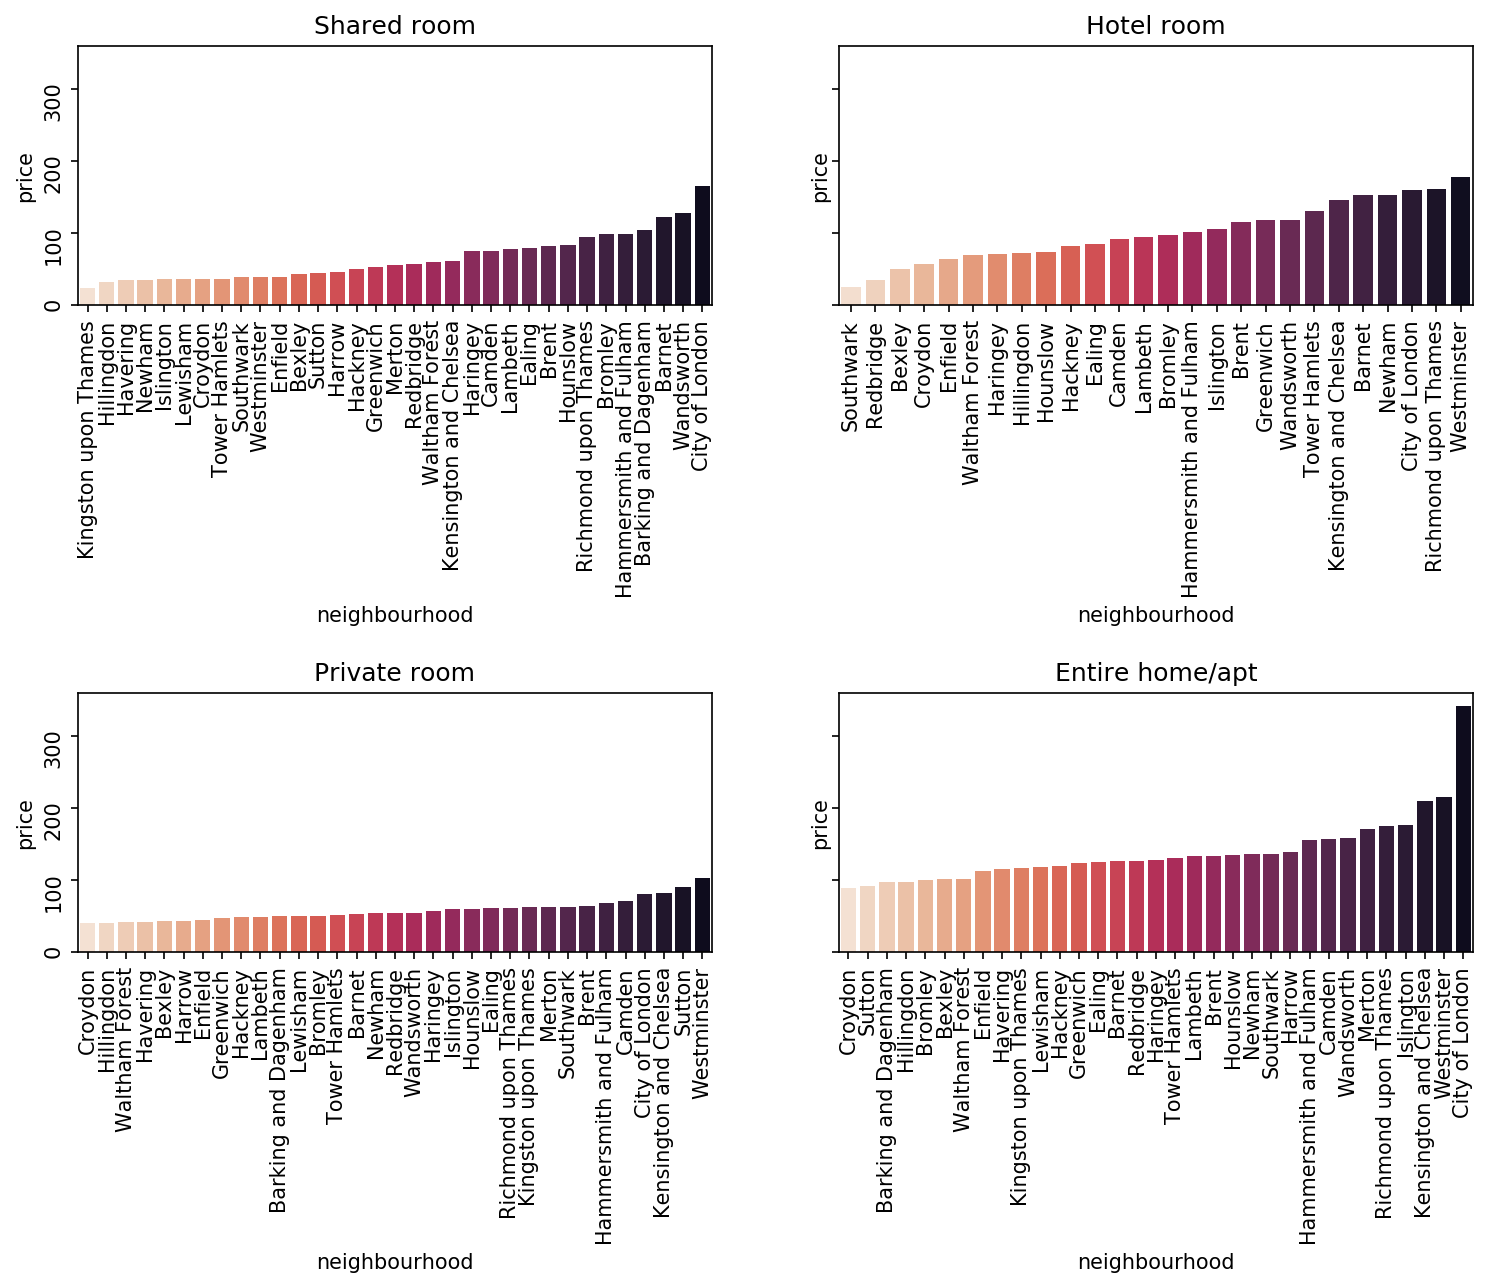

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=150, sharey=True)
for ax, listing_type in zip(axes.flatten(), _.room_type.unique()):
    sns.barplot(x='neighbourhood', y='price', data=_[_.room_type==listing_type], ax=ax, palette='rocket_r')
    ax.tick_params(labelrotation=90)
    ax.set_title(listing_type)
    plt.subplots_adjust(hspace=1.5)